<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

#### Read the dataset in the csv file from the URL


In [17]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

### Display basic information about the dataset

In [18]:
print("Dataset Shape:", boston_df.shape)
print("\nFirst 5 rows:")
print(boston_df.head())
print("\nDataset Information:")
print(boston_df.info())
print("\nDescriptive Statistics:")
print(boston_df.describe())

Dataset Shape: (506, 14)

First 5 rows:
   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2

## Task 2: Generate Descriptive Statistics and Visualizations
### 2.1. Boxplot for Median Value of Owner-Occupied Homes

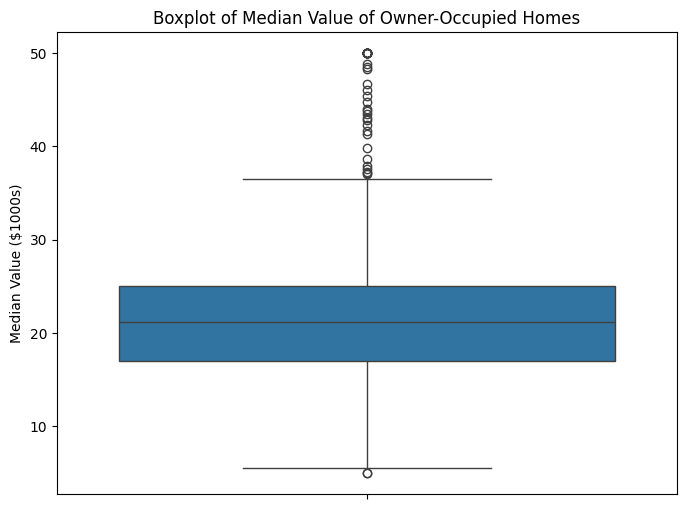

In [19]:
pyplot.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.ylabel('Median Value ($1000s)')
pyplot.show()

### 2.2. Bar Plot for Charles River Variable

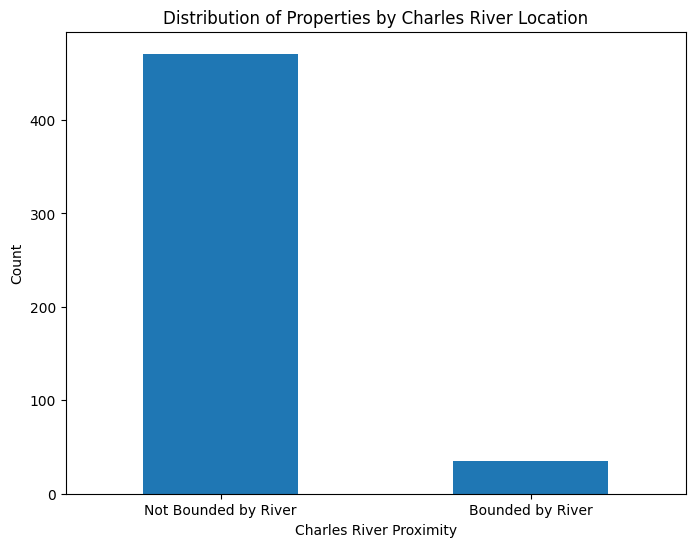

In [21]:
pyplot.figure(figsize=(8, 6))
chas_counts = boston_df['CHAS'].value_counts()
chas_counts.index = ['Not Bounded by River', 'Bounded by River']
chas_counts.plot(kind='bar')
pyplot.title('Distribution of Properties by Charles River Location')
pyplot.xlabel('Charles River Proximity')
pyplot.ylabel('Count')
pyplot.xticks(rotation=0)
pyplot.show()

### 2.3. Boxplot for MEDV vs AGE

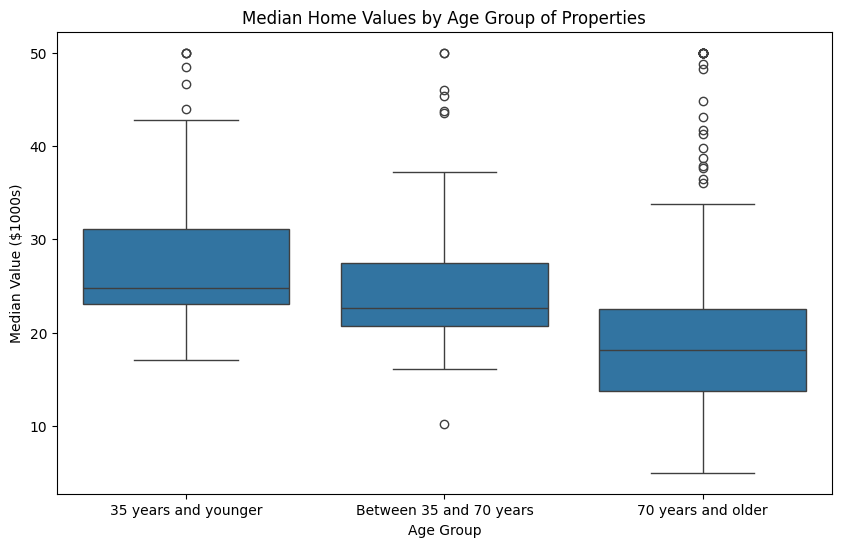

In [22]:
# Discretize AGE variable
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], 
    bins=[0, 35, 70, 100], 
    labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])

pyplot.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title('Median Home Values by Age Group of Properties')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value ($1000s)')
pyplot.show()

### 2.4. Scatter Plot: NOX vs INDUS

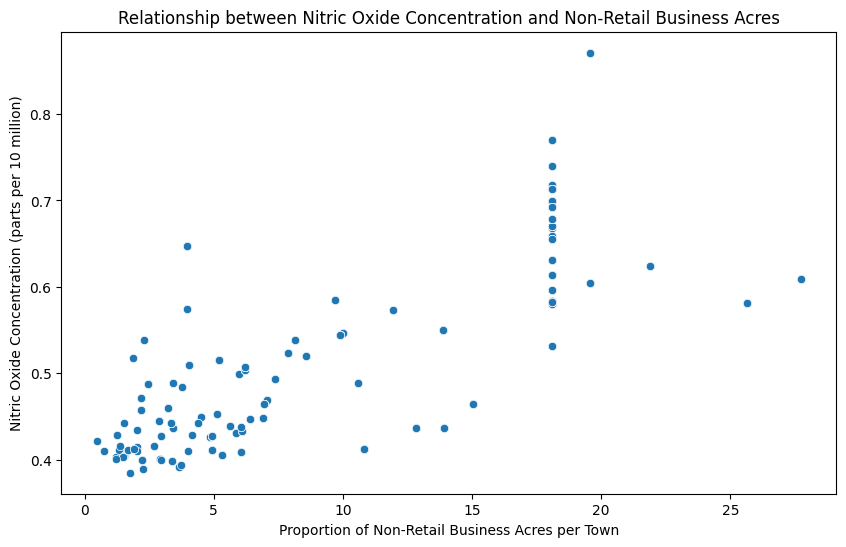

Correlation coefficient between INDUS and NOX: 0.764


In [23]:
pyplot.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Relationship between Nitric Oxide Concentration and Non-Retail Business Acres')
pyplot.xlabel('Proportion of Non-Retail Business Acres per Town')
pyplot.ylabel('Nitric Oxide Concentration (parts per 10 million)')
pyplot.show()

# Calculate correlation coefficient
correlation = boston_df['INDUS'].corr(boston_df['NOX'])
print(f"Correlation coefficient between INDUS and NOX: {correlation:.3f}")

### 2.5. Histogram for Pupil-Teacher Ratio

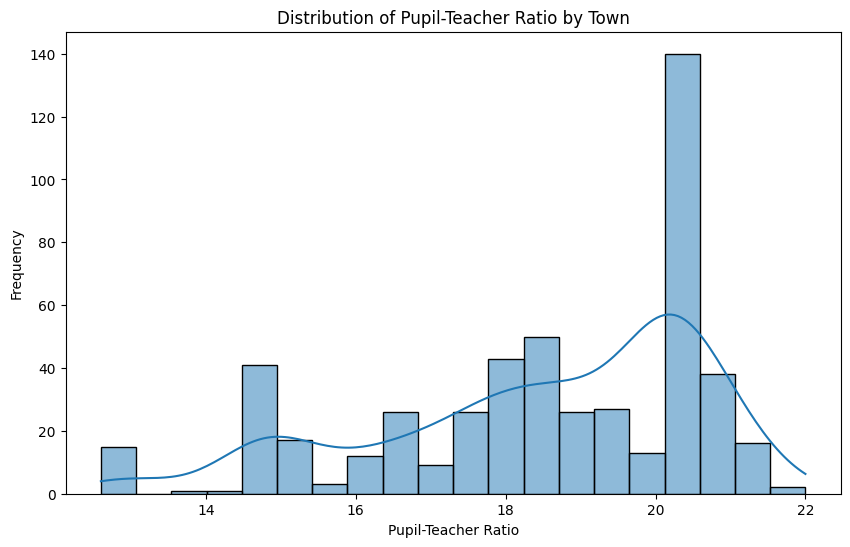

In [24]:
pyplot.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
pyplot.title('Distribution of Pupil-Teacher Ratio by Town')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

## Task 3: Statistical Tests

### 3.1. T-test: MEDV by Charles River

In [25]:
# Hypothesis:
# H0: There is no significant difference in median home values between properties bounded by Charles River and those not bounded
# H1: There is a significant difference in median home values

river_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_river_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = scipy.stats.ttest_ind(river_bounded, not_river_bounded)

print("T-test for MEDV by Charles River:")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in median home values based on Charles River proximity.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in median home values based on Charles River proximity.")

T-test for MEDV by Charles River:
T-statistic: 3.996
P-value: 0.000
Conclusion: Reject the null hypothesis. There is a significant difference in median home values based on Charles River proximity.


### 3.2. ANOVA: MEDV by AGE Groups

In [ ]:
 # Hypothesis:
# H0: There is no difference in median home values across different age groups
# H1: There is a difference in median home values across different age groups

age_groups = [boston_df[boston_df['AGE_GROUP'] == group]['MEDV'] 
    for group in boston_df['AGE_GROUP'].unique()]

f_stat, p_value = scipy.stats.f_oneway(*age_groups)

print("\nANOVA for MEDV by AGE Groups:")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in median home values across age groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in median home values across age groups.")


ANOVA for MEDV by AGE Groups:
F-statistic: 36.408
P-value: 0.000
Conclusion: Reject the null hypothesis. There is a significant difference in median home values across age groups.


### 3.3. Pearson Correlation: NOX vs INDUS

In [27]:
# Hypothesis:
# H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres
# H1: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres

corr_coef, p_value = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

print("\nPearson Correlation between NOX and INDUS:")
print(f"Correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant relationship between NOX and INDUS.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant relationship between NOX and INDUS.")


Pearson Correlation between NOX and INDUS:
Correlation coefficient: 0.764
P-value: 0.000
Conclusion: Reject the null hypothesis. There is a significant relationship between NOX and INDUS.


### 3.4. Regression Analysis: DIS vs MEDV

In [28]:
# Hypothesis:
# H0: Weighted distance to employment centers has no impact on median home values
# H1: Weighted distance to employment centers has an impact on median home values

# Add constant for regression
X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']

# Fit regression model
model = sm.OLS(y, X).fit()

print("\nRegression Analysis: Impact of Distance to Employment Centers on Home Values")
print(model.summary())

# Extract the coefficient and p-value for DIS
dis_coef = model.params['DIS']
dis_pvalue = model.pvalues['DIS']

print(f"\nCoefficient for DIS: {dis_coef:.3f}")
print(f"P-value for DIS: {dis_pvalue:.3f}")

if dis_pvalue < 0.05:
    print("Conclusion: Reject the null hypothesis. Distance to employment centers has a significant impact on median home values.")
    print(f"Interpretation: For each additional unit of weighted distance to employment centers, the median home value changes by ${dis_coef:.3f} thousand.")
else:
    
    print("Conclusion: Fail to reject the null hypothesis. Distance to employment centers has no significant impact on median home values.")


Regression Analysis: Impact of Distance to Employment Centers on Home Values
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        21:53:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------